In [1]:
##Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams



In [2]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_1 = pd.read_csv("Sparkling.csv",parse_dates=True,squeeze=True,index_col=0)

In [4]:
df_1

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
              ... 
1995-03-01    1897
1995-04-01    1862
1995-05-01    1670
1995-06-01    1688
1995-07-01    2031
Name: Sparkling, Length: 187, dtype: int64

In [5]:
df_2 = pd.read_csv("Sparkling.csv")

In [135]:
df_2.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [136]:
df_2.tail()

YearMonth  Sparkling Time_Stamp
182   1995-03       1897 1995-03-31
183   1995-04       1862 1995-04-30
184   1995-05       1670 1995-05-31
185   1995-06       1688 1995-06-30
186   1995-07       2031 1995-07-31

In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [8]:
df_2.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [9]:
date = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=192, freq='M')

In [10]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [11]:
df_2['Time_Stamp'] = pd.to_datetime(df_2['Time_Stamp'])

In [12]:
df = df_2.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [13]:
df_1.describe()

count     187.000000
mean     2402.417112
std      1295.111540
min      1070.000000
25%      1605.000000
50%      1874.000000
75%      2549.000000
max      7242.000000
Name: Sparkling, dtype: float64

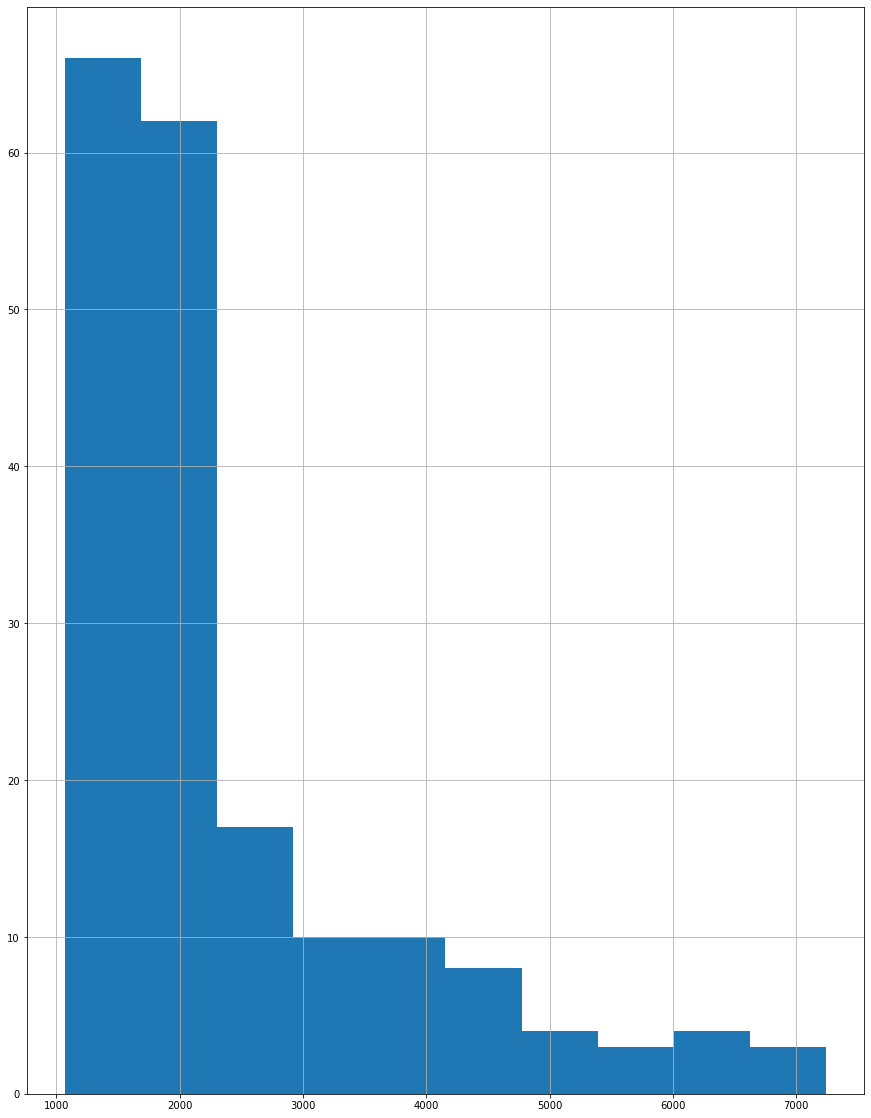

In [14]:
#Univariate analysis

df_1.hist(figsize=(15,20));

In [15]:
df_2.columns

Index(['YearMonth', 'Sparkling', 'Time_Stamp'], dtype='object')

In [16]:
import scipy.stats as stats

# Measure the skeweness of the required columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df_2.Sparkling)]},
                        index=['Sparkling'])  

Skewness

Skewness
Sparkling  1.802999

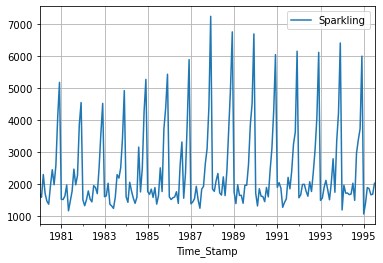

In [17]:
df.plot();
plt.grid()

date = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')
date

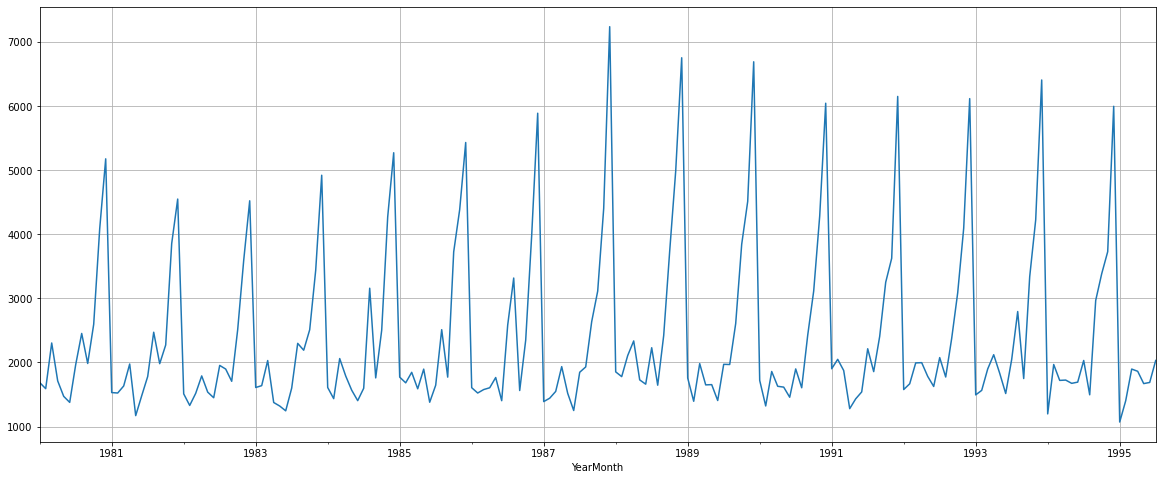

In [18]:
df_1.plot(figsize=(20,8))
plt.grid();

In [19]:
round(df.describe(),3)

Sparkling
count    187.000
mean    2402.417
std     1295.112
min     1070.000
25%     1605.000
50%     1874.000
75%     2549.000
max     7242.000

In [20]:
df.shape

(187, 1)

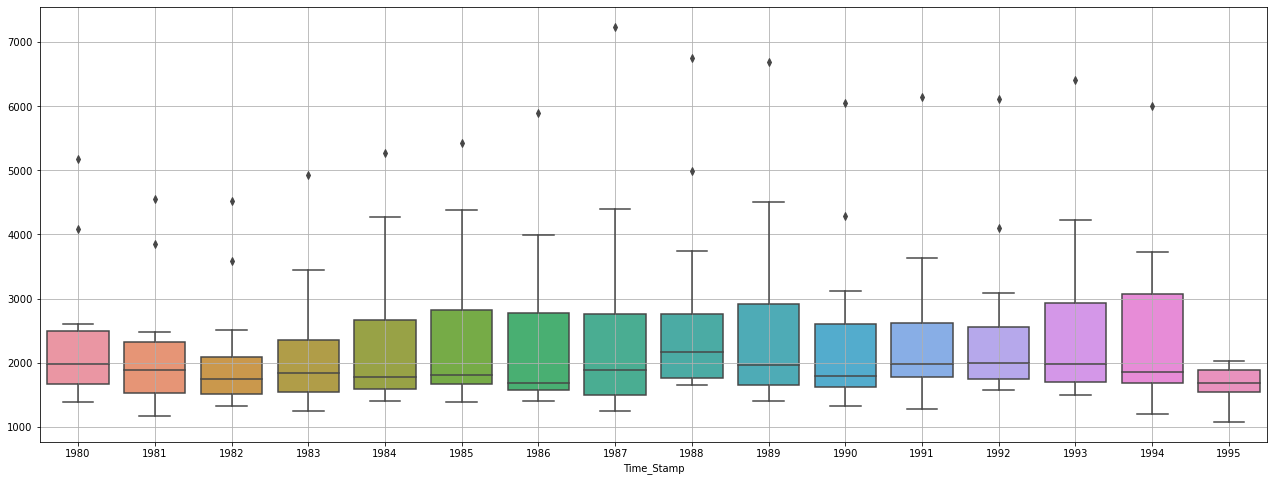

In [21]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

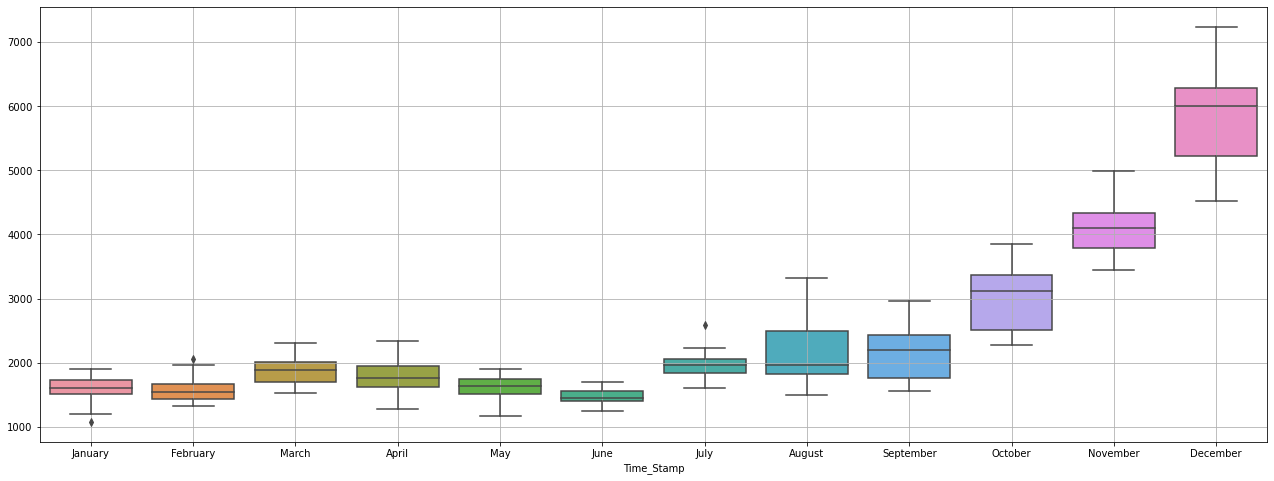

In [22]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [23]:
monthly_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_across_years

Time_Stamp   April  August  December  February  January    July    June  \
Time_Stamp                                                                
1980        1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981        1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982        1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983        1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984        1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985        1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986        1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987        1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988        2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989        1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990        1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991        1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992        1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993        2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994        1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995        1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

Time_Stamp   March     May  November  October  September  
Time_Stamp                                                
1980        2304.0  1471.0    4087.0   2596.0     1984.0  
1981        1633.0  1170.0    3857.0   2273.0     1981.0  
1982        1518.0  1537.0    3593.0   2514.0     1706.0  
1983        2030.0  1320.0    3440.0   2511.0     2191.0  
1984        2061.0  1567.0    4273.0   2504.0     1759.0  
1985        1846.0  1896.0    4388.0   3727.0     1771.0  
1986        1577.0  1765.0    3987.0   2349.0     1562.0  
1987        1548.0  1518.0    4405.0   3114.0     2638.0  
1988        2108.0  1728.0    4988.0   3740.0     2421.0  
1989        1982.0  1654.0    4514.0   3845.0     2608.0  
1990        1859.0  1615.0    4286.0   3116.0     2424.0  
1991        1874.0  1432.0    3627.0   3252.0     2408.0  
1992        1993.0  1783.0    4096.0   3088.0     2377.0  
1993        1898.0  1831.0    4227.0   3339.0     1749.0  
1994        1720.0  1674.0    3729.0   3385.0     2968.0  
1995        1897.0  1670.0       NaN      NaN        NaN

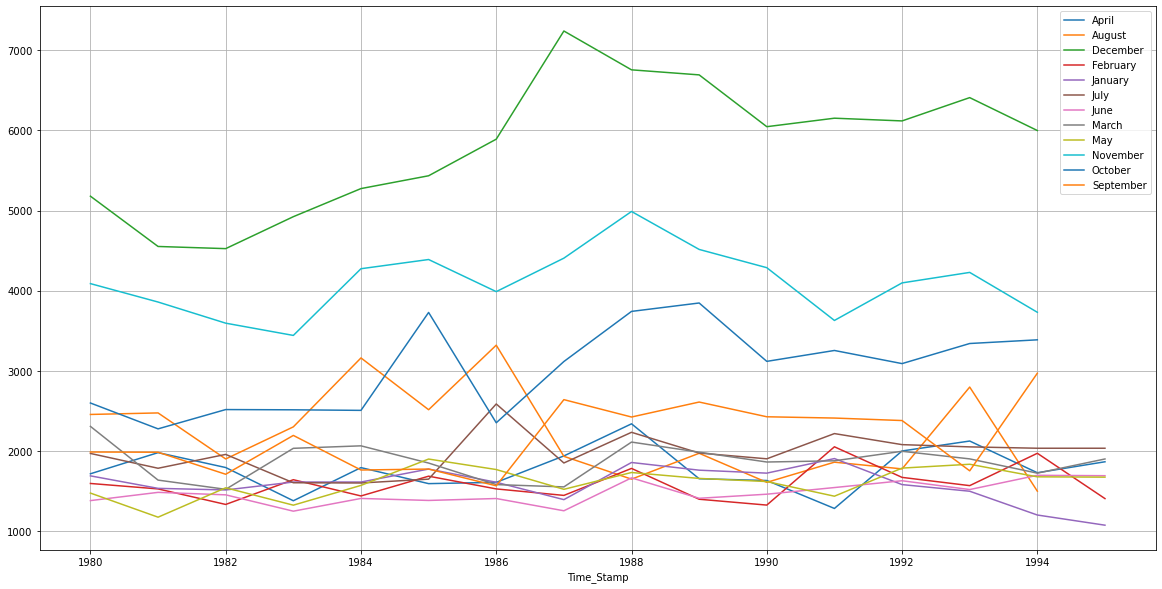

In [24]:
monthly_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

In [25]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

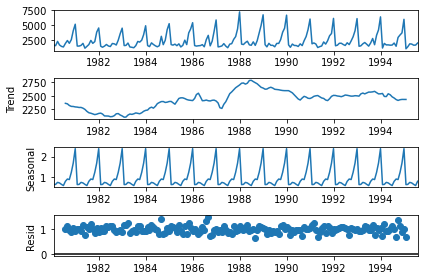

In [26]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [27]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

In [28]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [29]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [30]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



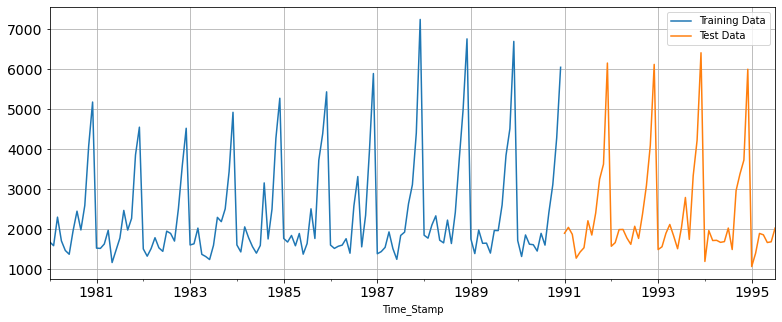

In [31]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Model 1: Linear Regression

In [32]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [33]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [34]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902    43
1991-02-28       2049    44
1991-03-31       1874    45
1991-04-30       1279    46
1991-05-31       1432    47 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897    93
1995-04-30       1862    94
1995-05-31       1670    95
1995-06-30       1688    96
1995-07-31       2031    97 



In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

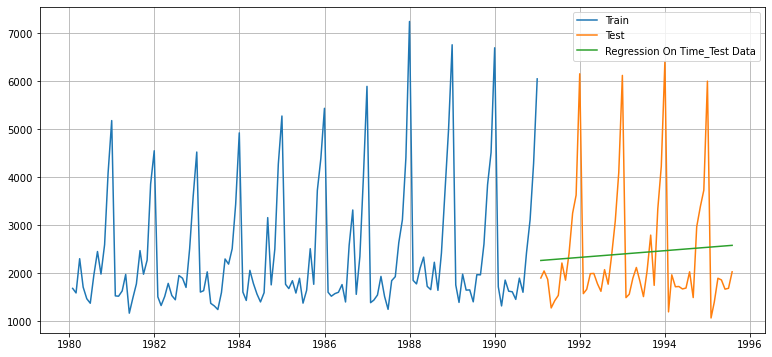

In [38]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [39]:
from sklearn import metrics

In [40]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867


In [41]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1275.867052

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

In [42]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [43]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

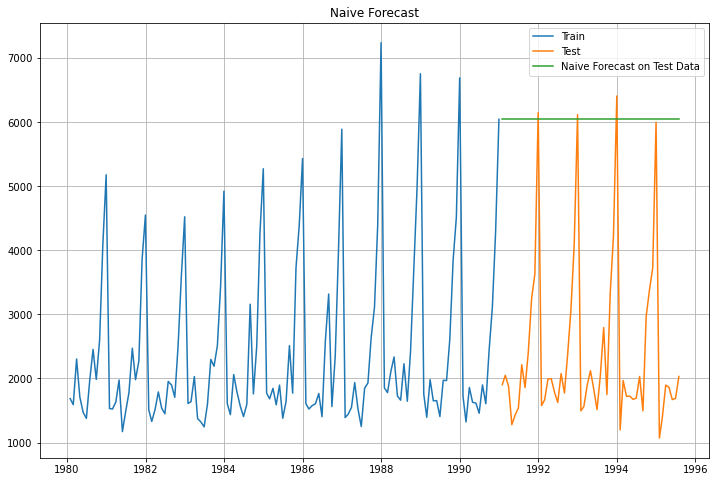

In [44]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [45]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [46]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1275.867052
NaiveModel        3864.279352

## Method 3: Simple Average

In [47]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [48]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

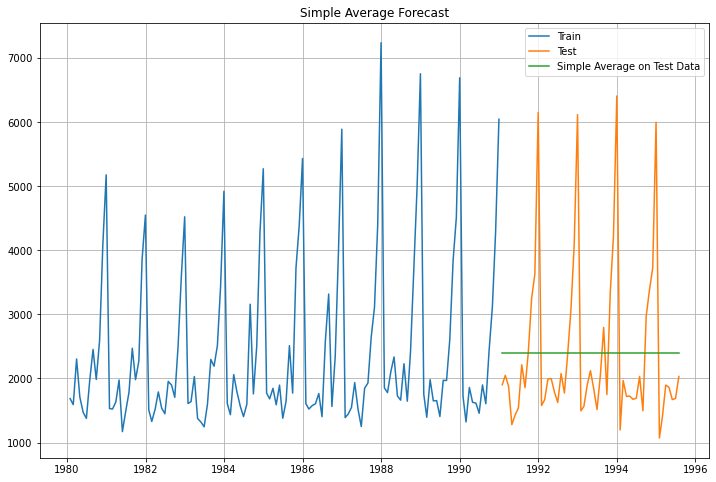

In [49]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [50]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [51]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1275.867052
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

## Model 4 : Moving Average

In [52]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [53]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

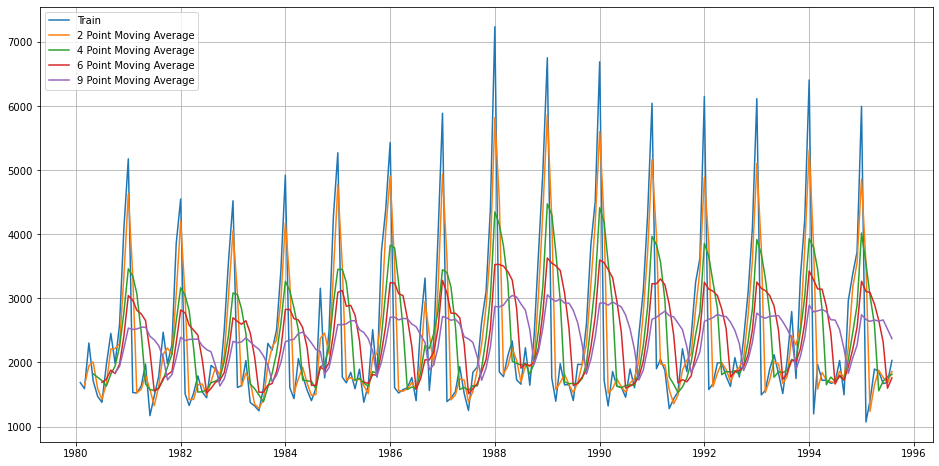

In [54]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [55]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:55] 
trailing_MovingAverage_test=MovingAverage[55:110]

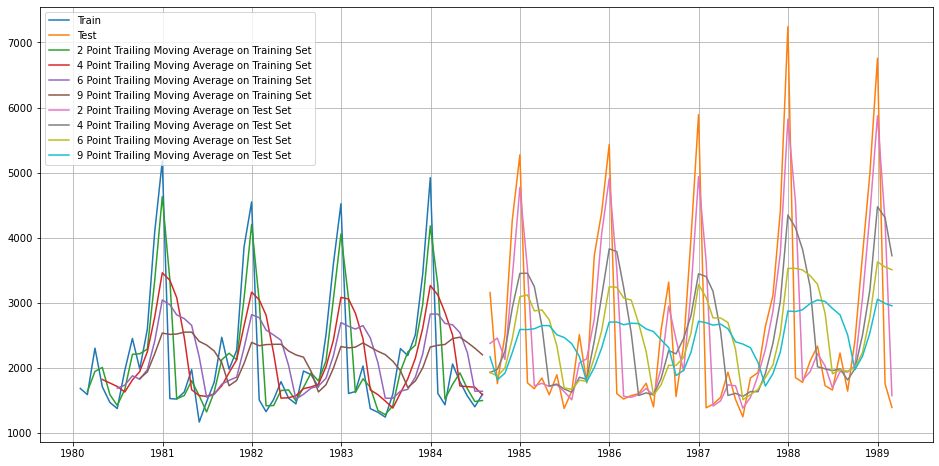

In [56]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [57]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 2070.919
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1837.745
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1654.989
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1286.231 


In [58]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1275.867052
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage  2070.918532
4pointTrailingMovingAverage  1837.745348
6pointTrailingMovingAverage  1654.989198
9pointTrailingMovingAverage  1286.231497

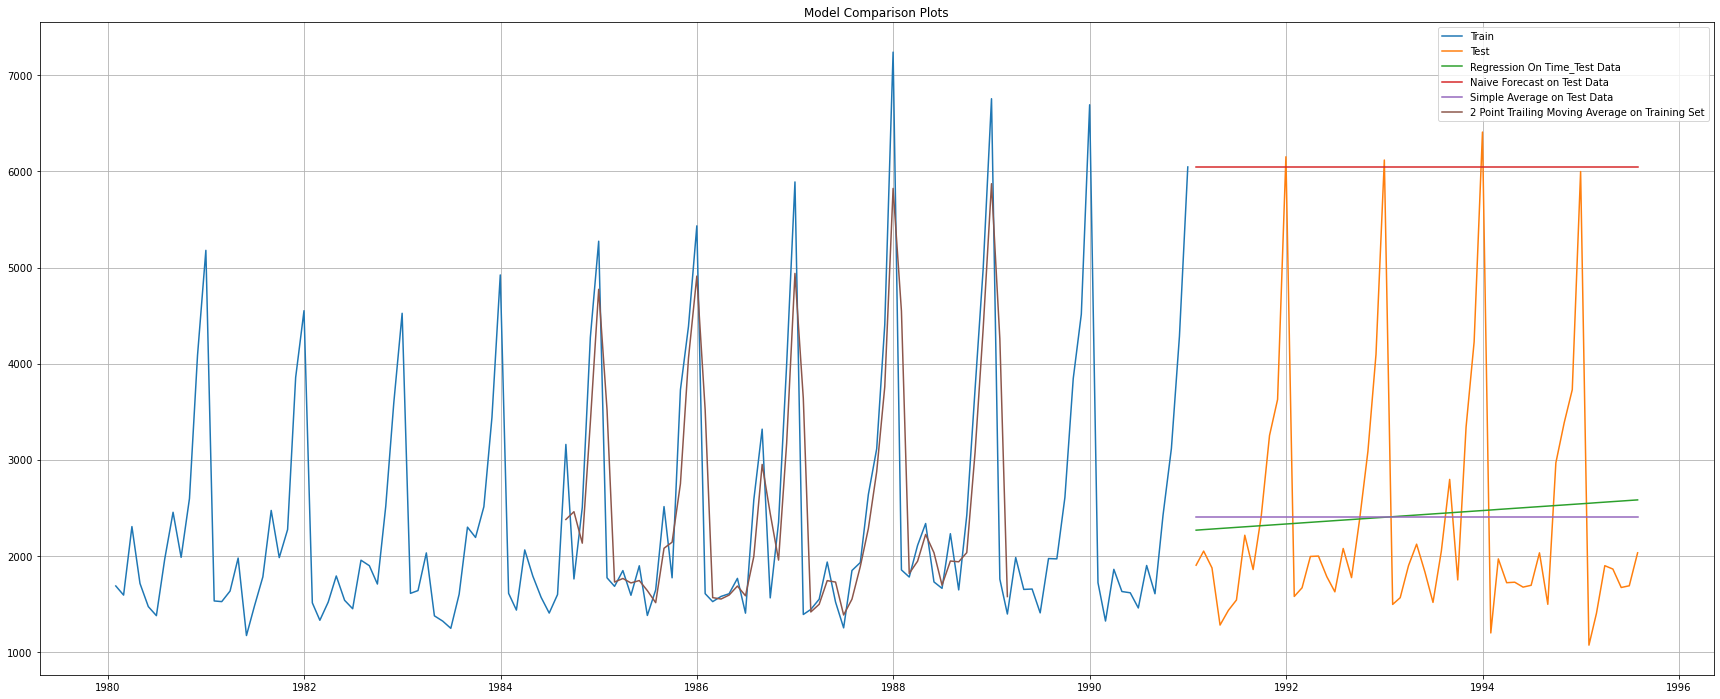

In [59]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [60]:
## Method 5: Simple Exponential Smoothing

In [61]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [62]:
SES_train = train.copy()
SES_test = test.copy()

In [63]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [64]:
model_SES_autofit = model_SES.fit(optimized=True)

In [65]:
model_SES_autofit.params

{'smoothing_level': 0.04960659880745971,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [66]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2724.929339
1991-02-28       2049  2724.929339
1991-03-31       1874  2724.929339
1991-04-30       1279  2724.929339
1991-05-31       1432  2724.929339

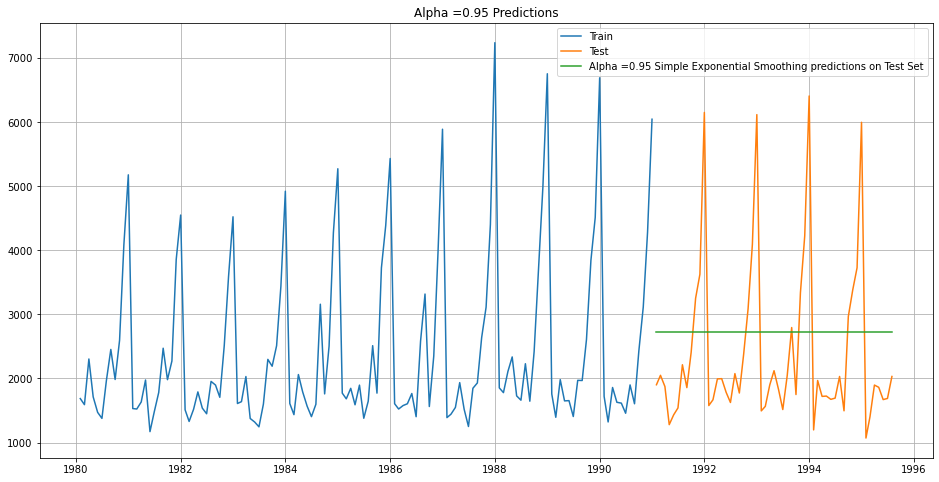

In [67]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.95 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.95 Predictions');

In [68]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.95 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.95 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [69]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                        1275.867052
NaiveModel                              3864.279352
SimpleAverageModel                      1275.081804
2pointTrailingMovingAverage             2070.918532
4pointTrailingMovingAverage             1837.745348
6pointTrailingMovingAverage             1654.989198
9pointTrailingMovingAverage             1286.231497
Alpha=0.995,SimpleExponentialSmoothing  1316.034674

In [70]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [71]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

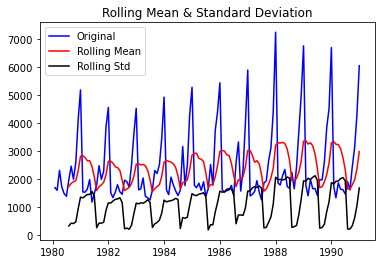

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [72]:
test_stationarity(train['Sparkling'])

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

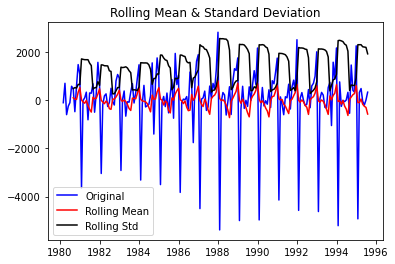

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [73]:
test_stationarity(df['Sparkling'].diff().dropna())

In [74]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 0, 2, 7)
Model: (0, 0, 2)(1, 0, 0, 7)
Model: (0, 0, 2)(1, 0, 1, 7)


In [75]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC


Empty DataFrame
Columns: [param, AIC]
Index: []

In [76]:
train['Sparkling']

Time_Stamp
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
              ... 
1990-08-31    1605
1990-09-30    2424
1990-10-31    3116
1990-11-30    4286
1990-12-31    6047
Name: Sparkling, Length: 132, dtype: int64

In [77]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:2271.203212328525
ARIMA(0, 0, 1) - AIC:2245.2688520024008
ARIMA(0, 0, 2) - AIC:2245.3432156895997
ARIMA(1, 0, 0) - AIC:2247.348272015277
ARIMA(1, 0, 1) - AIC:2245.9490899377656
ARIMA(1, 0, 2) - AIC:2246.0121932804605
ARIMA(2, 0, 0) - AIC:2244.79991468496
ARIMA(2, 0, 1) - AIC:2236.590818676384
ARIMA(2, 0, 2) - AIC:2200.904528855171


In [78]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 0, 2)  2200.904529
7  (2, 0, 1)  2236.590819
6  (2, 0, 0)  2244.799915
1  (0, 0, 1)  2245.268852
2  (0, 0, 2)  2245.343216
4  (1, 0, 1)  2245.949090
5  (1, 0, 2)  2246.012193
3  (1, 0, 0)  2247.348272
0  (0, 0, 0)  2271.203212

In [79]:
## ARIMA(2,0,2) has the lowest AIC
mod = ARIMA(train['Sparkling'], order=(2,0,2))

results_Arima = mod.fit()

print(results_Arima.summary())

                              ARMA Model Results                              
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                     ARMA(2, 2)   Log Likelihood               -1094.452
Method:                       css-mle   S.D. of innovations            933.016
Date:                Sun, 07 Nov 2021   AIC                           2200.905
Time:                        18:34:50   BIC                           2218.201
Sample:                    01-31-1980   HQIC                          2207.933
                         - 12-31-1990                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2399.2362     53.727     44.656      0.000    2293.933    2504.539
ar.L1.Sparkling     1.7209      0.014    124.026      0.000       1.694       1.748
ar.L2.Sparkling    -0.9849      

In [80]:
test.Sparkling= test.Sparkling.astype(float)
final_hat_avg =test.copy()
pred = results_Arima.forecast(steps=55)

In [81]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test.Sparkling,pred[0],squared=False)
print(rmse)

1004.9571684821343


In [141]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,0,2)'])

resultsDf

RMSE
ARIMA(2,0,2)  1174.798984

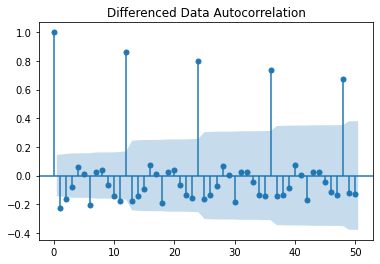

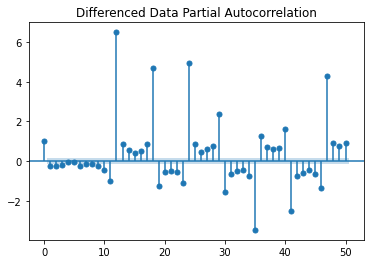

In [143]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [145]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.791
Method:                           css   S.D. of innovations           1377.911
Date:                Sun, 07 Nov 2021   AIC                           2269.583
Time:                        19:14:04   BIC                           2275.333
Sample:                    02-29-1980   HQIC                          2271.919
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2901    120.389      0.277      0.782    -202.667     269.248


In [146]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [148]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

4779.15429919654


In [149]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,0,2)  1174.798984
ARIMA(0,1,0)  4779.154299

In [83]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [84]:
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [85]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:2447.5387828489993
SARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:2288.4461936309804
SARIMA(0, 0, 0)x(0, 0, 2, 7)7 - AIC:2118.272441459562
SARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:2253.92025455397
SARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:2191.2516357418917
SARIMA(0, 0, 0)x(1, 0, 2, 7)7 - AIC:2027.630047699761
SARIMA(0, 0, 0)x(2, 0, 0, 7)7 - AIC:2084.5015682299772
SARIMA(0, 0, 0)x(2, 0, 1, 7)7 - AIC:2057.9173405654715
SARIMA(0, 0, 0)x(2, 0, 2, 7)7 - AIC:2045.335446106599
SARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:2337.107015896099
SARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:2200.4559782364813
SARIMA(0, 0, 1)x(0, 0, 2, 7)7 - AIC:2047.410847078211
SARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:2208.9146193465017
SARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:2127.860684566468
SARIMA(0, 0, 1)x(1, 0, 2, 7)7 - AIC:2000.645133182787
SARIMA(0, 0, 1)x(2, 0, 0, 7)7 - AIC:2047.172407015002
SARIMA(0, 0, 1)x(2, 0, 1, 7)7 - AIC:2033.0412392090932
SARIMA(0, 0, 1)x(2, 0, 2, 7)7 - AIC:2001.3229855868783
SARIMA(0, 0, 2)x(0, 

In [86]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
80  (2, 0, 2)  (2, 0, 2, 7)  1950.747335
47  (1, 0, 2)  (0, 0, 2, 7)  1970.814565
79  (2, 0, 2)  (2, 0, 1, 7)  1971.124479
50  (1, 0, 2)  (1, 0, 2, 7)  1972.204364
74  (2, 0, 2)  (0, 0, 2, 7)  1972.694492

In [87]:
import statsmodels.api as sm

## SARIMA(2, 0, 2)(2, 0, 2, 7)
mod = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2, 0, 2),
                                seasonal_order=(2, 0, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 7)   Log Likelihood                -966.374
Date:                           Sun, 07 Nov 2021   AIC                           1950.747
Time:                                   18:35:05   BIC                           1975.452
Sample:                               01-31-1980   HQIC                          1960.775
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7325      0.037     46.698      0.000       1.660       1.805
ar.L2         -1.0023      0.035    -28.751

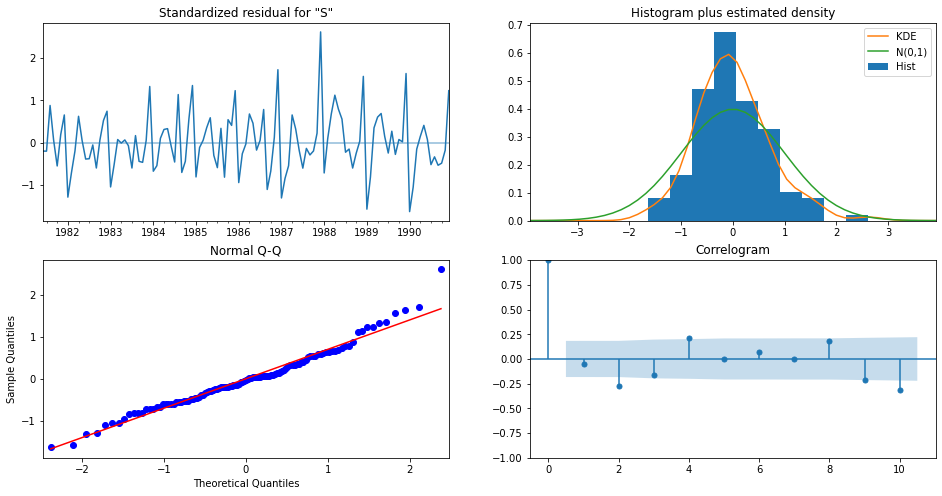

In [88]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [89]:
test.head()

Sparkling
Time_Stamp           
1991-01-31     1902.0
1991-02-28     2049.0
1991-03-31     1874.0
1991-04-30     1279.0
1991-05-31     1432.0

In [90]:
test.Sparkling= test.Sparkling.astype(float)
final_hat_avg =test.copy()
pred = results_SARIMA.get_forecast(steps=152)
pred.predicted_mean

1991-01-31    3890.947749
1991-02-28    2745.222145
1991-03-31    1886.132888
1991-04-30    1014.827010
1991-05-31     397.126213
                 ...     
2003-04-30    1369.692969
2003-05-31    1485.294294
2003-06-30    1764.548817
2003-07-31    2770.018441
2003-08-31    3613.405885
Freq: M, Name: predicted_mean, Length: 152, dtype: float64

In [91]:
pred.summary_frame()

Sparkling          mean      mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  3890.947749  1337.003816    1270.468423    6511.427075
1991-02-28  2745.222145  1338.991308     120.847407    5369.596884
1991-03-31  1886.132888  1354.216015    -768.081729    4540.347504
1991-04-30  1014.827010  1380.917225   -1691.721016    3721.375036
1991-05-31   397.126213  1406.677579   -2359.911179    3154.163606
...                 ...          ...            ...            ...
2003-04-30  1369.692969  2507.236366   -3544.400008    6283.785947
2003-05-31  1485.294294  2512.685572   -3439.478931    6410.067520
2003-06-30  1764.548817  2513.020984   -3160.881803    6689.979437
2003-07-31  2770.018441  2513.296151   -2155.951498    7695.988380
2003-08-31  3613.405885  2518.422974   -1322.612442    8549.424212

[152 rows x 4 columns]

In [92]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(2,0,2)(2,0,2,7)'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

RMSE
ARIMA(2,0,2)            1004.957168
SARIMA(2,0,2)(2,0,2,7)  1004.957168

In [93]:
## To get the real forecast for 7 days, we will rerun the model on the complete dataset

mod = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(0,0,1),
                                seasonal_order=(2, 0, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                       SARIMAX Results                                        
Dep. Variable:                              Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 0, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -1471.825
Date:                                Sun, 07 Nov 2021   AIC                           2955.649
Time:                                        18:35:06   BIC                           2974.499
Sample:                                    01-31-1980   HQIC                          2963.298
                                         - 07-31-1995                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8136      0.048     16.806      0.000       0.719       0.908
ar.

In [94]:
pred = results.get_forecast(steps=7)
pred.predicted_mean

1995-08-31    2930.546079
1995-09-30    2119.702937
1995-10-31    2069.389030
1995-11-30    2214.358802
1995-12-31    2552.935099
1996-01-31    2101.205471
1996-02-29    3269.245601
Freq: M, Name: predicted_mean, dtype: float64

In [95]:
pred.summary_frame()

Sparkling          mean      mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  2930.546079  1312.953246     357.205004    5503.887154
1995-09-30  2119.702937  1690.775036   -1194.155240    5433.561114
1995-10-31  2069.389030  1690.922307   -1244.757792    5383.535852
1995-11-30  2214.358802  1691.614655   -1101.144997    5529.862602
1995-12-31  2552.935099  1690.422649    -760.232411    5866.102609
1996-01-31  2101.205471  1690.307608   -1211.736564    5414.147506
1996-02-29  3269.245601  1690.309591     -43.700319    6582.191522

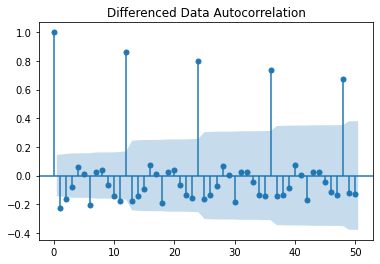

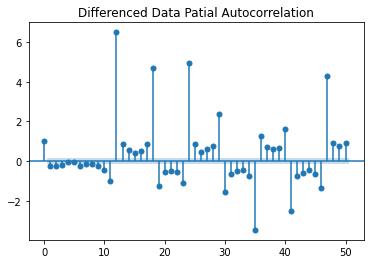

In [112]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

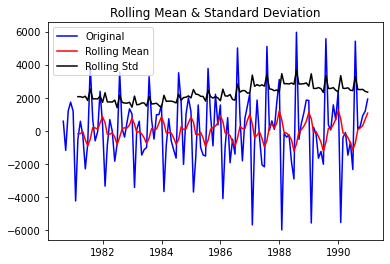

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [118]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

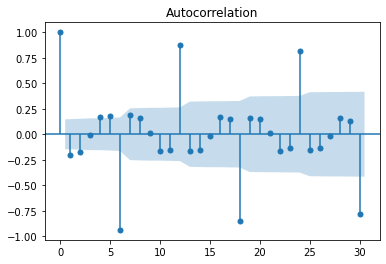

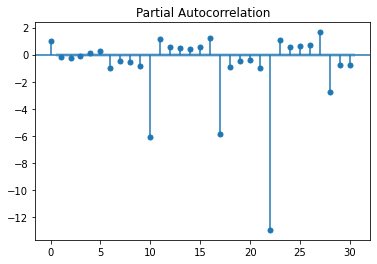

In [119]:
plot_acf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [96]:
## SARIMAX models

In [97]:
SARIMAX_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
print(SARIMAX_AIC)

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []


In [98]:
## Let's first use SARIMAX with exogenous variable 

for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train['Sparkling'],exog=train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMAX = mod.fit()
        print('SARIMA{}{} - AIC:{}'.format(param, param_seasonal, results_SARIMAX.aic))
        SARIMAX_AIC = SARIMAX_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)


SARIMA(0, 0, 0)(0, 0, 0, 7) - AIC:-2771.6245761225746
SARIMA(0, 0, 0)(0, 0, 1, 7) - AIC:-2621.258231946558
SARIMA(0, 0, 0)(0, 0, 2, 7) - AIC:-2467.9757832717646
SARIMA(0, 0, 0)(1, 0, 0, 7) - AIC:-2642.496732941389
SARIMA(0, 0, 0)(1, 0, 1, 7) - AIC:-2613.2694902981057
SARIMA(0, 0, 0)(1, 0, 2, 7) - AIC:-2463.410487476508
SARIMA(0, 0, 0)(2, 0, 0, 7) - AIC:-2492.1809158966716
SARIMA(0, 0, 0)(2, 0, 1, 7) - AIC:-2489.1873424196447
SARIMA(0, 0, 0)(2, 0, 2, 7) - AIC:-2456.548232605806
SARIMA(0, 0, 1)(0, 0, 0, 7) - AIC:-2747.886619863237
SARIMA(0, 0, 1)(0, 0, 1, 7) - AIC:-2597.5119061084806
SARIMA(0, 0, 1)(0, 0, 2, 7) - AIC:-2444.2300422585736
SARIMA(0, 0, 1)(1, 0, 0, 7) - AIC:-2639.946750545582
SARIMA(0, 0, 1)(1, 0, 1, 7) - AIC:-2589.605060649397
SARIMA(0, 0, 1)(1, 0, 2, 7) - AIC:-2439.7585692229086
SARIMA(0, 0, 1)(2, 0, 0, 7) - AIC:-2489.630933500864
SARIMA(0, 0, 1)(2, 0, 1, 7) - AIC:-2486.672868054032
SARIMA(0, 0, 1)(2, 0, 2, 7) - AIC:-2432.855914190958
SARIMA(0, 0, 2)(0, 0, 0, 7) - AIC:-272

In [99]:
SARIMAX_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
0   (0, 0, 0)  (0, 0, 0, 7) -2771.624576
27  (1, 0, 0)  (0, 0, 0, 7) -2769.624576
9   (0, 0, 1)  (0, 0, 0, 7) -2747.886620
54  (2, 0, 0)  (0, 0, 0, 7) -2746.436602
36  (1, 0, 1)  (0, 0, 0, 7) -2746.375328

In [100]:
## SARIMA(1, 0, 2)(2, 0, 2, 7)
mod = sm.tsa.statespace.SARIMAX(train['Sparkling'],exog=train,
                                order=(1,0,2),
                                seasonal_order=(2, 0, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 0, 2)x(2, 0, 2, 7)   Log Likelihood                1212.957
Date:                           Sun, 07 Nov 2021   AIC                          -2407.913
Time:                                   18:35:14   BIC                          -2383.209
Sample:                               01-31-1980   HQIC                         -2397.886
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Sparkling      1.0000    2.9e-18   3.45e+17      0.000       1.000       1.000
ar.L1          0.9719         -0       -inf

In [101]:
pred = results.get_forecast(steps=55,exog=test)
pred.predicted_mean

1991-01-31    1902.0
1991-02-28    2049.0
1991-03-31    1874.0
1991-04-30    1279.0
1991-05-31    1432.0
1991-06-30    1540.0
1991-07-31    2214.0
1991-08-31    1857.0
1991-09-30    2408.0
1991-10-31    3252.0
1991-11-30    3627.0
1991-12-31    6153.0
1992-01-31    1577.0
1992-02-29    1667.0
1992-03-31    1993.0
1992-04-30    1997.0
1992-05-31    1783.0
1992-06-30    1625.0
1992-07-31    2076.0
1992-08-31    1773.0
1992-09-30    2377.0
1992-10-31    3088.0
1992-11-30    4096.0
1992-12-31    6119.0
1993-01-31    1494.0
1993-02-28    1564.0
1993-03-31    1898.0
1993-04-30    2121.0
1993-05-31    1831.0
1993-06-30    1515.0
1993-07-31    2048.0
1993-08-31    2795.0
1993-09-30    1749.0
1993-10-31    3339.0
1993-11-30    4227.0
1993-12-31    6410.0
1994-01-31    1197.0
1994-02-28    1968.0
1994-03-31    1720.0
1994-04-30    1725.0
1994-05-31    1674.0
1994-06-30    1693.0
1994-07-31    2031.0
1994-08-31    1495.0
1994-09-30    2968.0
1994-10-31    3385.0
1994-11-30    3729.0
1994-12-31   

In [104]:
import math
rmse_SARIMAX = math.sqrt(mean_squared_error(test.Sparkling ,pred.predicted_mean))
print(rmse_SARIMAX)

7.078193677597893e-13


In [121]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse_SARIMAX]}
                           ,index=['SARIMAX(1,0,2)(2,0,2,7)'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

RMSE
ARIMA(2,0,2)                 1.004957e+03
SARIMA(2,0,2)(2,0,2,7)       1.004957e+03
SARIMAX(1,0,2)(2,0,2)7       7.078194e-13
SARIMAX_tvlm(1,0,2)(2,0,2)7  0.000000e+00
SARIMAX(1,0,2)(2,0,2,7)      7.078194e-13

# ----------

In [128]:


full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,0,2),
                                seasonal_order=(2, 0, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 0, 2)x(2, 0, 2, 7)   Log Likelihood               -1449.392
Date:                           Sun, 07 Nov 2021   AIC                           2914.783
Time:                                   19:02:17   BIC                           2939.870
Sample:                               01-31-1980   HQIC                          2924.963
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0006      0.001    869.609      0.000       0.998       1.003
ma.L1         -0.7296      0.158     -4.613

In [130]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [131]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean      mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  2966.300448  1369.140152     282.835060    5649.765836
1995-09-30  2376.136079  1419.524860    -406.081522    5158.353680
1995-10-31  3278.447522  1419.785394     495.719284    6061.175760
1995-11-30  2396.336540  1420.040558    -386.891810    5179.564890
1995-12-31  3019.837137  1420.339884     236.022117    5803.652156

In [133]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 1174.7989843965743


In [137]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index
(pd.date_range(start='1995-08-31',end='1996-08-31', freq='M'))

DatetimeIndex(['1995-08-31', '1995-09-30', '1995-10-31', '1995-11-30',
               '1995-12-31', '1996-01-31', '1996-02-29', '1996-03-31',
               '1996-04-30', '1996-05-31', '1996-06-30', '1996-07-31',
               '1996-08-31'],
              dtype='datetime64[ns]', freq='M')

In [123]:
pred = results.get_forecast(steps=55,exog=test)
pred.predicted_mean

1991-01-31    1902.0
1991-02-28    2049.0
1991-03-31    1874.0
1991-04-30    1279.0
1991-05-31    1432.0
1991-06-30    1540.0
1991-07-31    2214.0
1991-08-31    1857.0
1991-09-30    2408.0
1991-10-31    3252.0
1991-11-30    3627.0
1991-12-31    6153.0
1992-01-31    1577.0
1992-02-29    1667.0
1992-03-31    1993.0
1992-04-30    1997.0
1992-05-31    1783.0
1992-06-30    1625.0
1992-07-31    2076.0
1992-08-31    1773.0
1992-09-30    2377.0
1992-10-31    3088.0
1992-11-30    4096.0
1992-12-31    6119.0
1993-01-31    1494.0
1993-02-28    1564.0
1993-03-31    1898.0
1993-04-30    2121.0
1993-05-31    1831.0
1993-06-30    1515.0
1993-07-31    2048.0
1993-08-31    2795.0
1993-09-30    1749.0
1993-10-31    3339.0
1993-11-30    4227.0
1993-12-31    6410.0
1994-01-31    1197.0
1994-02-28    1968.0
1994-03-31    1720.0
1994-04-30    1725.0
1994-05-31    1674.0
1994-06-30    1693.0
1994-07-31    2031.0
1994-08-31    1495.0
1994-09-30    2968.0
1994-10-31    3385.0
1994-11-30    3729.0
1994-12-31   

In [124]:
rmse_SARIMAX_timevarying = math.sqrt(mean_squared_error(test.Sparkling ,pred.predicted_mean))
print(rmse_SARIMAX_timevarying)

0.0


In [125]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse_SARIMAX_timevarying]}
                           ,index=['SARIMAX_tvlm(1,0,2)(2,0,2)7'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

RMSE
ARIMA(2,0,2)                 1.004957e+03
SARIMA(2,0,2)(2,0,2,7)       1.004957e+03
SARIMAX(1,0,2)(2,0,2)7       7.078194e-13
SARIMAX_tvlm(1,0,2)(2,0,2)7  0.000000e+00
SARIMAX(1,0,2)(2,0,2,7)      7.078194e-13
SARIMAX_tvlm(1,0,2)(2,0,2)7  0.000000e+00